# Capítulo 3 · Análisis exploratorio (EDA)

> **Objetivo:** detectar relaciones y elegir variables relevantes para modelar `SalePrice` en *Ames Housing*.

Este cuaderno genera gráficos y resúmenes automáticos:

- Histogramas y boxplots de `SalePrice`
- Dispersión `SalePrice` vs `GrLivArea`
- Heatmap de correlaciones principales
- Comparaciones por categorías (`Neighborhood`, `OverallQual`)
- Selección de **variables candidatas** (8–12) basada en correlaciones y colinealidad


## 3.1 Carga del dataset y preparación mínima

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta estándar del proyecto
DATA_PATHS = [Path('data/ames_housing.csv'), Path('AmesHousing.csv')]
for p in DATA_PATHS:
    if p.exists():
        DATA_PATH = p
        break
else:
    raise FileNotFoundError('No se encontró data/ames_housing.csv ni AmesHousing.csv')

df = pd.read_csv(DATA_PATH)

# Variables de interés inicial
target = 'SalePrice'
basic_feats = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
               'YearBuilt', 'FullBath', 'LotArea']

# Asegurar tipos
if df[target].dtype == 'O':
    df[target] = pd.to_numeric(df[target], errors='coerce')

# Vista general
print(df.shape)
df.head(3)

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


## 3.2 Histograma y boxplot de `SalePrice`

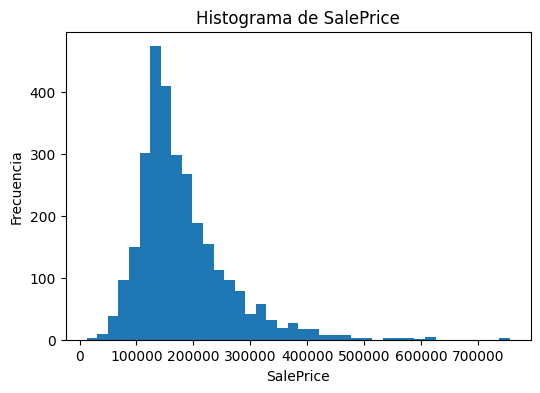

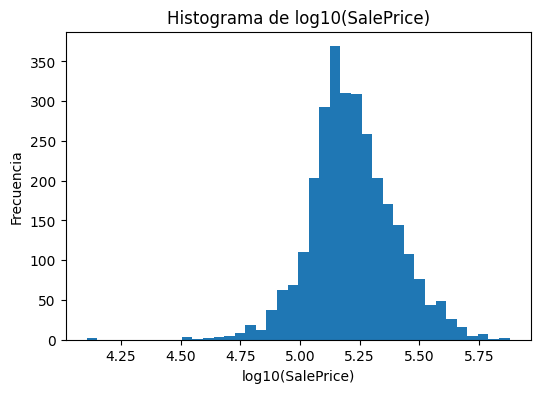

C:\Users\User\AppData\Local\Temp\ipykernel_16044\1973078800.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(series.dropna(), vert=True, labels=['SalePrice'])


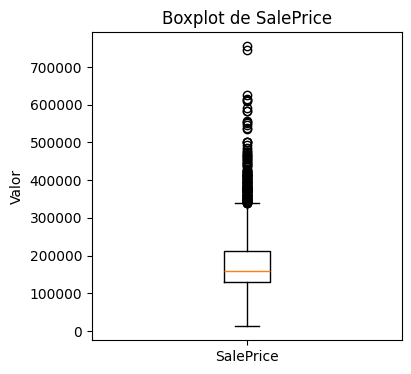

In [12]:
col = 'SalePrice'
series = df[col].dropna()

# Histograma (escala lineal)
plt.figure(figsize=(6,4))
plt.hist(series, bins=40)
plt.title('Histograma de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

# Histograma (log10) para ver simetría
plt.figure(figsize=(6,4))
plt.hist(np.log10(series), bins=40)
plt.title('Histograma de log10(SalePrice)')
plt.xlabel('log10(SalePrice)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot simple
plt.figure(figsize=(4,4))
plt.boxplot(series.dropna(), vert=True, labels=['SalePrice'])
plt.title('Boxplot de SalePrice')
plt.ylabel('Valor')
plt.show()

## 3.3 Dispersión: `SalePrice` vs `GrLivArea`

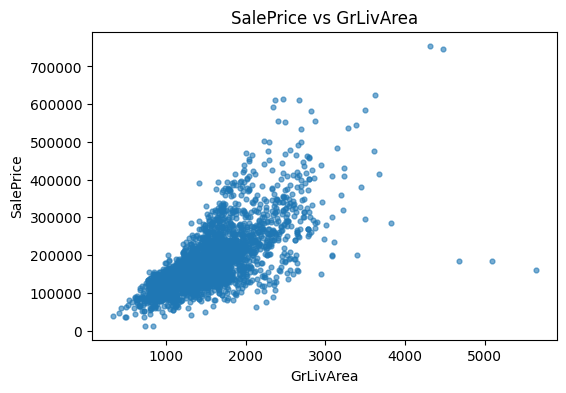

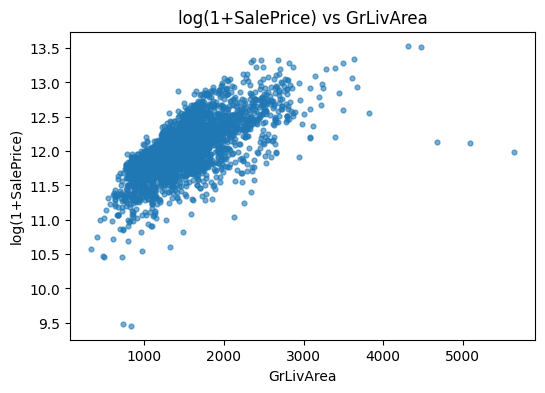

In [15]:
x, y = df['Gr Liv Area'], df['SalePrice']

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=12, alpha=0.6)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Versión log del precio para linealidad
plt.figure(figsize=(6,4))
plt.scatter(x, np.log1p(y), s=12, alpha=0.6)
plt.title('log(1+SalePrice) vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('log(1+SalePrice)')
plt.show()

## 3.4 Heatmap de correlaciones principales

Top correlaciones con SalePrice:
 SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Name: SalePrice, dtype: float64


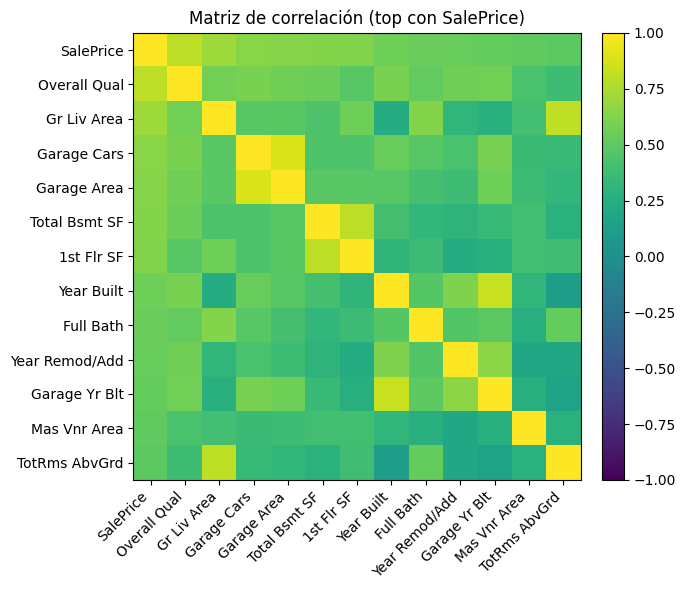

In [ ]:
# Seleccionar numéricas
num_df = df.select_dtypes(include=[np.number])
num_df = num_df.replace([np.inf, -np.inf], np.nan)

# Top por correlación absoluta con SalePrice
corr_target = num_df.corr(numeric_only=True)[target].dropna().abs().sort_values(ascending=False)
top_feats = corr_target.index[1:13]  # excluir SalePrice mismo (posición 0), tomar 12 siguientes
print('Top correlaciones con SalePrice:\n', corr_target.head(13))

corr_mat = num_df[[target, *top_feats]].corr()

# Heatmap manual con matplotlib
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(corr_mat, vmin=-1, vmax=1)
ax.set_xticks(range(len(corr_mat.columns)))
ax.set_yticks(range(len(corr_mat.index)))
ax.set_xticklabels(corr_mat.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_mat.index)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.title('Matriz de correlación (top con SalePrice)')
plt.tight_layout()
plt.show()

## 3.5 Boxplots por categorías

### 3.5.1 `OverallQual` (ordinal)

C:\Users\User\AppData\Local\Temp\ipykernel_16044\1741650317.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


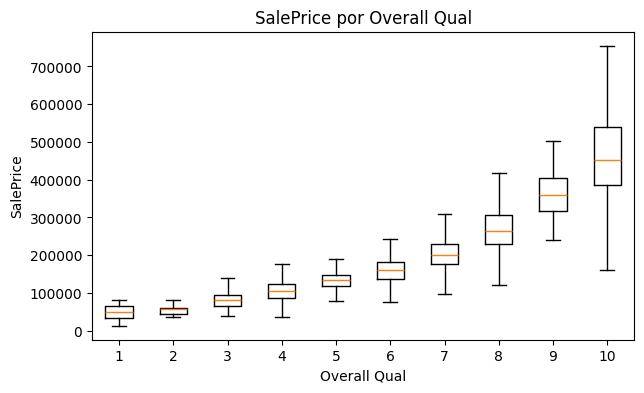

In [20]:
col = 'Overall Qual'
tmp = df[[col, target]].dropna()
groups = [g[target].values for _, g in tmp.groupby(col)]
labels = [str(int(v)) for v in sorted(tmp[col].unique())]

plt.figure(figsize=(7,4))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title(f'SalePrice por {col}')
plt.xlabel(col)
plt.ylabel('SalePrice')
plt.show()

### 3.5.2 `Neighborhood` (muchas categorías)

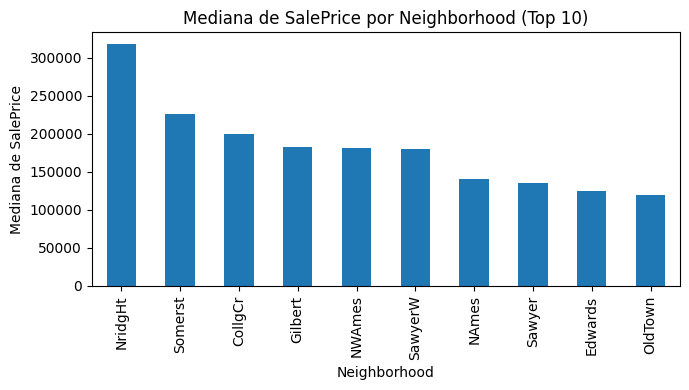

In [ ]:
col = 'Neighborhood'
topN = 10
freq = df[col].value_counts().head(topN).index
med = (df[df[col].isin(freq)]
       .groupby(col)[target].median()
       .sort_values(ascending=False))

plt.figure(figsize=(7,4))
med.plot(kind='bar')
plt.title('Mediana de SalePrice por Neighborhood (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Mediana de SalePrice')
plt.tight_layout()
plt.show()

## 3.6 Selección de variables candidatas (8–12)

In [ ]:
# Criterios usados:
# 1) Correlación absoluta alta con SalePrice (top k)
# 2) Evitar multicolinealidad: si dos variables tienen |ρ|>0.85, quedarse con una
# 3) Preferir variables estructurales

k = 15  # empezamos con un pool un poco mayor
corr_abs = num_df.corr(numeric_only=True)[target].dropna().abs().sort_values(ascending=False)
pool = list(corr_abs.index[1:k+1])  # quitar SalePrice

sel = []
for v in pool:
    if not sel:
        sel.append(v)
        continue
    ok = True
    for u in sel:
        r = abs(num_df[[v, u]].corr().iloc[0,1])
        if r > 0.85:
            ok = False
            break
    if ok:
        sel.append(v)
    if len(sel) >= 12:
        break

print('Variables candidatas (<=12, sin alta colinealidad):')
for i, v in enumerate(sel, 1):
    print(f'{i:>2}. {v}  (|ρ|={corr_abs[v]:.3f})')

Variables candidatas (<=12, sin alta colinealidad):
 1. Overall Qual  (|ρ|=0.799)
 2. Gr Liv Area  (|ρ|=0.707)
 3. Garage Cars  (|ρ|=0.648)
 4. Total Bsmt SF  (|ρ|=0.632)
 5. 1st Flr SF  (|ρ|=0.622)
 6. Year Built  (|ρ|=0.558)
 7. Full Bath  (|ρ|=0.546)
 8. Year Remod/Add  (|ρ|=0.533)
 9. Garage Yr Blt  (|ρ|=0.527)
10. Mas Vnr Area  (|ρ|=0.508)
11. TotRms AbvGrd  (|ρ|=0.495)
12. Fireplaces  (|ρ|=0.475)


## 3.7 Key takeaways

- `SalePrice` es asimétrica; una transformación log mejora linealidad y homocedasticidad.  
- `GrLivArea`, `OverallQual`, `GarageCars/Area`, `TotalBsmtSF`, `YearBuilt` suelen correlacionarse fuertemente con el precio.  
- Conviene evitar variables casi duplicadas (p. ej., `GarageArea` vs `GarageCars`).  
- La lista de candidatas prioriza interpretación y baja colinealidad para el modelo base del capítulo OLS.
